In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading Training and test data
train_data=pd.read_csv(r"C:\Users\91987\Downloads\risk_analytics_train.csv",index_col=0,header=0)
test_data=pd.read_csv(r"C:\Users\91987\Downloads\risk_analytics_test.csv",index_col=0,header=0)

# Preprocessing the data set 


In [3]:
print(train_data.shape)
train_data.head()

(614, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(test_data.shape)
test_data.head()

(367, 11)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# finding the missing values 

In [6]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [7]:
colname1=["Gender","Married","Dependents","Self_Employed","Loan_Amount_Term"]

for x in colname1:
    train_data[x].fillna(train_data[x].mode()[0],inplace=True)
    test_data[x].fillna(test_data[x].mode()[0],inplace=True)

In [8]:
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [9]:
# Imputing numerical missing data with mean values 
train_data['LoanAmount'].fillna(round(train_data['LoanAmount'].mean(),0),inplace=True)
test_data['LoanAmount'].fillna(round(test_data['LoanAmount'].mean(),0),inplace=True)
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())
                                

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [10]:
train_data.Credit_History.mode()

0    1.0
dtype: float64

In [11]:
# imputing values for credit_history coloumn differently
train_data["Credit_History"].fillna(value=0,inplace=True)
test_data["Credit_History"].fillna(value=0,inplace=True)

print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [12]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
# Transforming Categorical Data to Numerical
from sklearn.preprocessing import LabelEncoder
colname=['Gender', 'Married', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']
le=LabelEncoder()
for x in colname:
    train_data[x]=le.fit_transform(train_data[x])

In [14]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [15]:
colname=['Gender', 'Married', 'Education', 'Self_Employed','Property_Area',]
le=LabelEncoder()
for x in colname:
    test_data[x]=le.fit_transform(test_data[x])

In [16]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


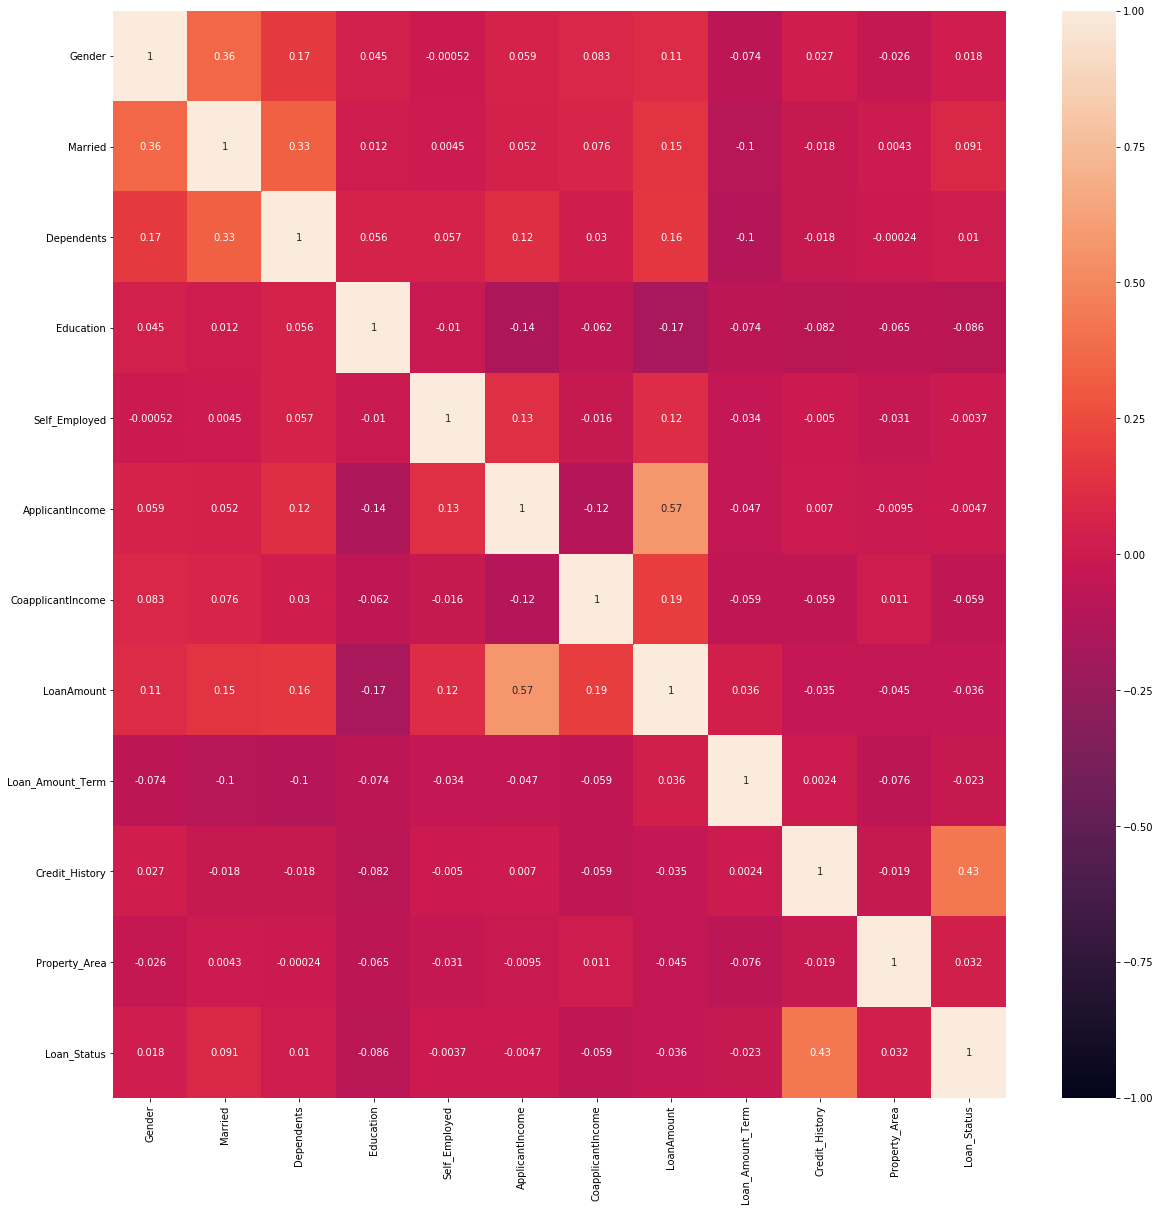

In [17]:
corr_df=train_data.corr()
#print(corr_df)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,vmin=-1.0,vmax=1.0,annot=True)
plt.show()

In [18]:
X_train=train_data.values[:,0:-1]
Y_train=train_data.values[:,-1]
Y_train=Y_train.astype(int)

In [19]:
X_train.shape

(614, 11)

In [20]:
X_test=test_data.values[:,:]

In [21]:
X_test.shape

(367, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
print(X_train)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -1.84858491
  -0.04760721]]


In [47]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)
svc_model.fit(X_train,Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

# Evualting the model

In [25]:
svc_model.score(X_train,Y_train)
# score --
# Y_pred=svc_model.predict(X_train)
# accuracy_score(Y_train,Y_pred)

0.7947882736156352

In [26]:
# this accuracy will be high as it is on training data so quote less accuracy to client

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

Y_pred_new=svc_model.predict(X_train)
print(confusion_matrix(Y_train,Y_pred_new))
print(classification_report(Y_train,Y_pred_new))

[[103  89]
 [ 37 385]]
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       192
           1       0.81      0.91      0.86       422

    accuracy                           0.79       614
   macro avg       0.77      0.72      0.74       614
weighted avg       0.79      0.79      0.78       614



In [28]:
# reports generated on the training data itself since we didn't have the Y_test
#reports suggest that that the overall model is good wrt our class of imp {Eligible}
# Lower Type 2 error , so lower business loss ( Where we are going to reject the eligible customers )

In [30]:
test_data=pd.read_csv(r"C:\Users\91987\Downloads\risk_analytics_test.csv",header=0)
test_data['Y_predications']=Y_pred
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predications
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [31]:
test_data['Y_predications']=test_data['Y_predications'].replace({1:"Eligible",0:"Not Eligible"})

In [32]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y_predications
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Eligible
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Eligible
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Eligible
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Not Eligible
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Eligible


In [33]:
test_data.to_excel(r'test_data_output.xlsx',index=False)

In [35]:
test_data.Y_predications.value_counts()

Eligible        285
Not Eligible     82
Name: Y_predications, dtype: int64

In [38]:
#Using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
 
#classifier=svm.SVC(kernel='rbf',C=1.0,gamma=0.1) #75.89%
#classifier=KNeighborsClassifier(n_neighbors=11, metric='euclidean') #75.07%
#classifier=svm.SVC(kernel='sigmoid',C=8,gamma=0.01) #77.03%
#classifier=svm.SVC(kernel='rbf',C=130.0,gamma=0.1) #77.03%
#classifier=LogisticRegression() #77.20%
#classifier=svm.SVC(kernel='linear',C=10,gamma=0.01) #77.03%
 
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.77419355 0.82258065 0.74193548 0.72580645 0.7704918  0.68852459
 0.80327869 0.7704918  0.78688525 0.83606557]
0.772025383395029


In [39]:
from sklearn import svm
 
svc_model = svm.SVC(kernel="rbf")
 
parameter_space = {
    #'kernel': ["linear","rbf","poly","sigmoid"],
    'gamma': [0.1,0.01,0.001],
    #"C": np.arange(0,101,5)
    'C': [1,5,8,10,20,30, 40,50,130]
    
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svc_model, parameter_space, n_jobs=-1, cv=5)

In [40]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 5, 8, 10, 20, 30, 40, 50, 130],
                         'gamma': [0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
print('Best parameters found:\n',clf.best_params_)

Best parameters found:
 {'C': 20, 'gamma': 0.01}


In [42]:
clf.best_score_   # accuracy of the best params using the 5 fold CV

0.7704118352658936

In [43]:
clf.score(X_train,Y_train) # accuracy of the best parameters on the train data

0.7768729641693811

In [44]:
Y_pred=clf.predict(X_test)
print(list(Y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [46]:
import pickle

In [48]:
# Save the model to disk
filename=r'svc_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [49]:
# Load the model from disk
loaded_model=pickle.load(open(filename,'rb'))
Y_pred=loaded_model.predict(X_test)
Y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,